# Pré-processamento das Imagens

Esse jupyter notebook possui como intuito fazer todo o pré-processamento das imagens utilizadas como dataset para treinar os modelos. Ele servirá para deixar as imagens com as dimensões e requesitos de acordo com o que o modelo necessita.

## Download de Dataset
Faça o download do dataset, por enquanto está sendo utilizado o dataset do CityScapes que pode ser obtido em [cityscapes-dataset](https://www.cityscapes-dataset.com/). Importe as bibliotecas necessárias e defina o caminho para o dataset com as imagens reais. 

In [55]:
from skimage import io
import numpy as np
import cv2 as cv

In [56]:
#Caminho para o diretório com as imagens reais
NAME_CITY = 'dusseldorf' #Cidade do dataset CityScapes
IMG_PATH = '/home/matheus/Documentos/Road_Detection_Dataset/leftImg8bit_trainvaltest/leftImg8bit/train/' + NAME_CITY

In [57]:
#Lendo todas as imagens do diretório com as imagens reais
img_collection = io.ImageCollection(IMG_PATH+'/*.png:'+IMG_PATH+'/*.jpg')

print(type(img_collection))

img_collection.files

<class 'skimage.io.collection.ImageCollection'>


['/home/matheus/Documentos/Road_Detection_Dataset/leftImg8bit_trainvaltest/leftImg8bit/train/dusseldorf/dusseldorf_000000_000019_leftImg8bit.png',
 '/home/matheus/Documentos/Road_Detection_Dataset/leftImg8bit_trainvaltest/leftImg8bit/train/dusseldorf/dusseldorf_000001_000019_leftImg8bit.png',
 '/home/matheus/Documentos/Road_Detection_Dataset/leftImg8bit_trainvaltest/leftImg8bit/train/dusseldorf/dusseldorf_000002_000019_leftImg8bit.png',
 '/home/matheus/Documentos/Road_Detection_Dataset/leftImg8bit_trainvaltest/leftImg8bit/train/dusseldorf/dusseldorf_000003_000019_leftImg8bit.png',
 '/home/matheus/Documentos/Road_Detection_Dataset/leftImg8bit_trainvaltest/leftImg8bit/train/dusseldorf/dusseldorf_000004_000019_leftImg8bit.png',
 '/home/matheus/Documentos/Road_Detection_Dataset/leftImg8bit_trainvaltest/leftImg8bit/train/dusseldorf/dusseldorf_000005_000019_leftImg8bit.png',
 '/home/matheus/Documentos/Road_Detection_Dataset/leftImg8bit_trainvaltest/leftImg8bit/train/dusseldorf/dusseldorf_000

## Testando redimensionamento
Abaixo será plotado algumas imagens para visualizar se são as imagens desejadas e para obter as dimensões originais. Determine a porcetagem que será reduzido da dimensão inicial, ou caso não seja necessário manter as proporções, defina diretamente as dimensões desejada para as imagens finais em *width* e *height*

Quantidade de imagens:  221
Dimensão das imagens:  (1024, 2048, 3)
Exemplos:


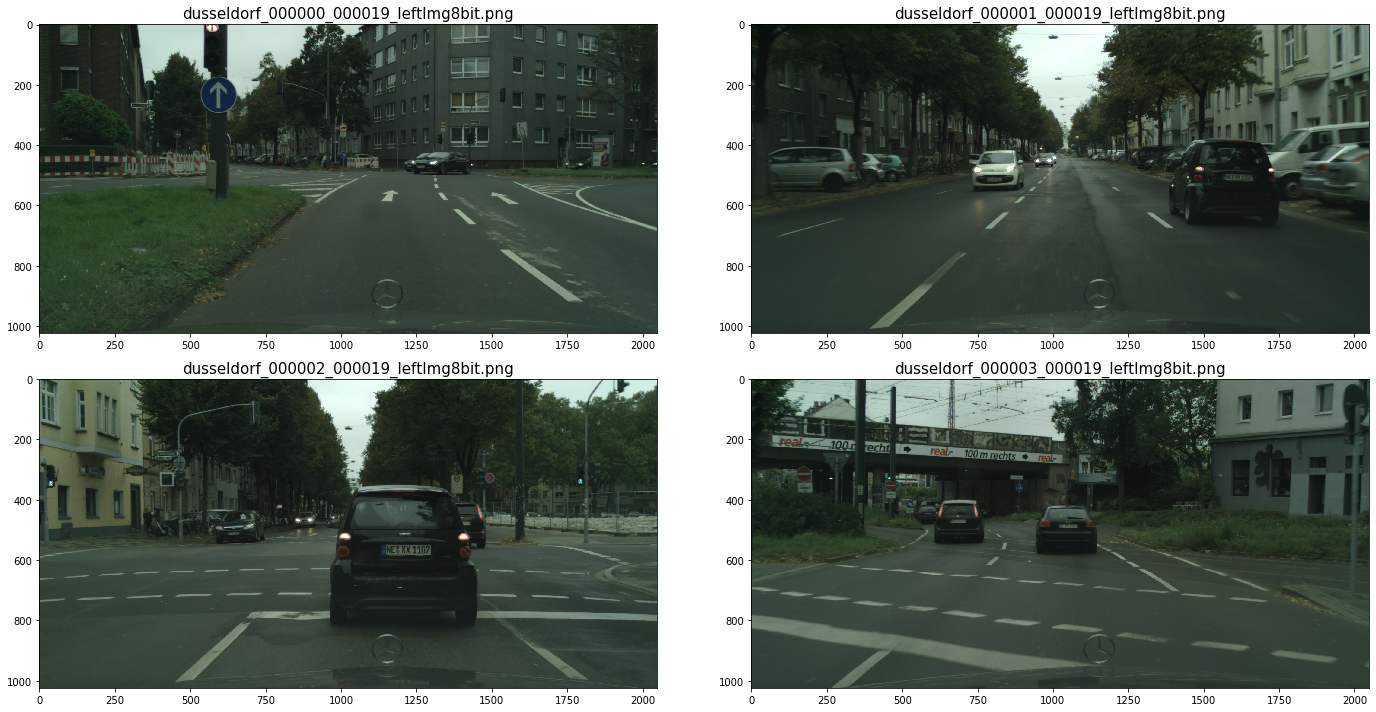

In [58]:
import matplotlib.pyplot as plt
import os

print("Quantidade de imagens: ", len(img_collection))
print("Dimensão das imagens: ",img_collection[0].shape)
print("Exemplos:")

f, axes = plt.subplots(2, 2, figsize=(20,10))

axes = axes.ravel()

for i, image in enumerate(img_collection):
    if(i >= 4):
        break
    axes[i].imshow(image)
    axes[i].set_title(os.path.basename(img_collection.files[i]), fontsize=15)
    
plt.tight_layout()

In [59]:
#Porcentagem escalonada
scale_percent = 0.125
#Altura e largura que será escalonado
initial_dim = (img_collection[0].shape[1], img_collection[0].shape[0])
width = int(initial_dim[0] * scale_percent)
height = int(initial_dim[1] * scale_percent)
#Tuple com as dimensoes
dim = (width, height)
print("Redimensionando de {} para {}".format((img_collection[0].shape[1], img_collection[0].shape[0]),dim))

Redimensionando de (2048, 1024) para (256, 128)


Exemplo redimensionado:


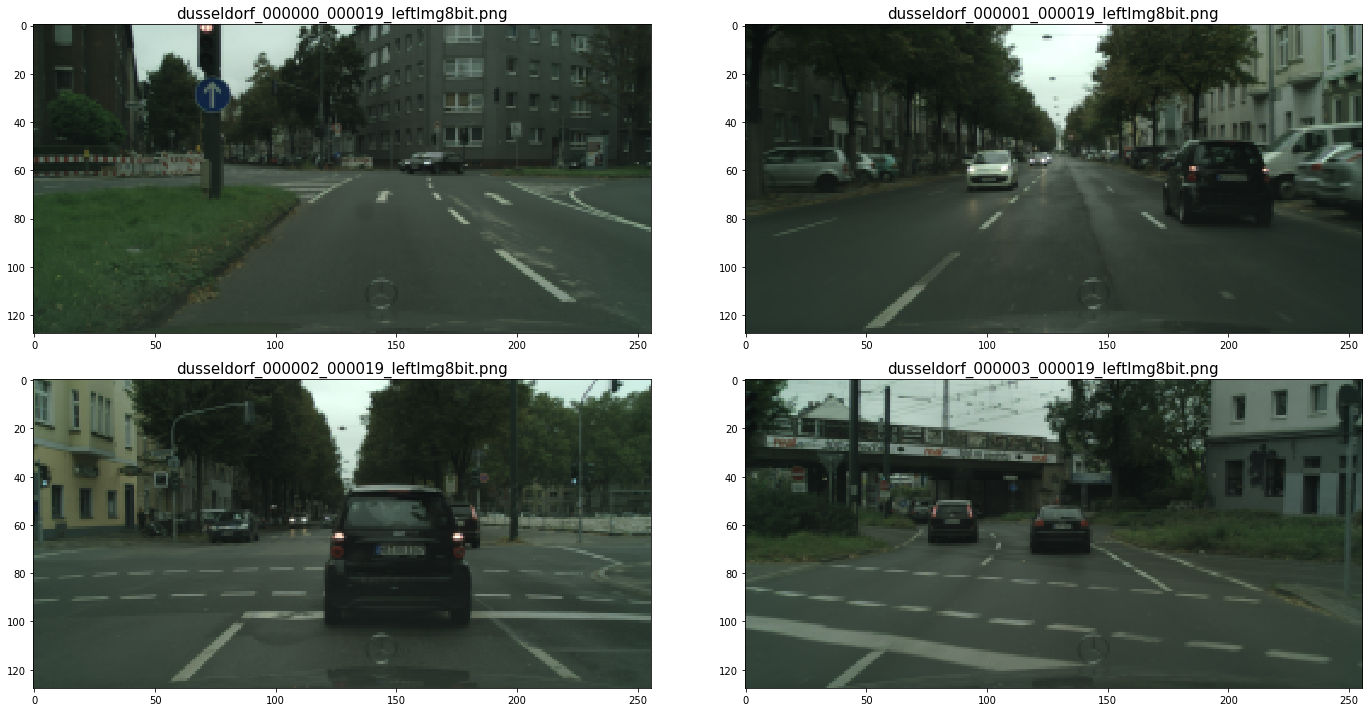

In [60]:
f, axes = plt.subplots(2, 2, figsize=(20,10))

axes = axes.ravel()
print("Exemplo redimensionado:")
for i, image in enumerate(img_collection):
    if(i >= 4):
        break
    resized = cv.resize(image, dim, interpolation = cv.INTER_AREA)
    axes[i].imshow(resized)
    axes[i].set_title(os.path.basename(img_collection.files[i]), fontsize=15)

plt.tight_layout()

## Redimensionando imagens reais
Defina o caminho para o dataset redimensionado e lembre de checar a posição correta para obter o nome dos arquivos a serem salvos. Lembre que as imagens tem que ser salva no formato ....../img/ para que consiga ser lido no Pytorch

In [65]:
DATA_SAVE = '/home/matheus/Documentos/E-Net_Road-Detection/CityScapes_RoadDetection/' #Pasta que salvarei
name_files = img_collection.files[0].split('/')
print(name_files[len(name_files)-1])

dusseldorf_000000_000019_leftImg8bit.png


In [66]:
#Indo para diretório que será salvo
print("Diretório atual: ", os.getcwd())
os.chdir(DATA_SAVE)
print("Mudando para: ", os.getcwd())
#Se a pasta não existir ela é criada
if not os.path.isdir(NAME_CITY):
    os.mkdir(NAME_CITY)
    os.chdir('./'+NAME_CITY)
    os.mkdir('real_image')
    os.chdir('./real_image')
    os.mkdir('img')
    os.chdir('./img')
else:
    os.chdir('./'+NAME_CITY+'/real_image/img')

print("Diretório final: ",os.getcwd())

Diretório atual:  /home/matheus/Documentos/E-Net_Road-Detection/CityScapes_RoadDetection/darmstadt/mask_image/img
Mudando para:  /home/matheus/Documentos/E-Net_Road-Detection/CityScapes_RoadDetection
Diretório final:  /home/matheus/Documentos/E-Net_Road-Detection/CityScapes_RoadDetection/dusseldorf/real_image/img


In [68]:
print('Redimensionando imagens reais..\n')

for i, image in enumerate(img_collection):
    resized = cv.resize(image, dim, interpolation = cv.INTER_AREA)
    name_files = img_collection.files[i].split('/')
    cv.imwrite(name_files[len(name_files)-1],resized)
    print('Imagem: '+name_files[len(name_files)-1]+' {}/{} - {:.0f}%'.format(i+1,len(img_collection),(i+1)/len(img_collection)*100) )

Redimensionando imagens reais..

Imagem: dusseldorf_000000_000019_leftImg8bit.png 1/221 - 0%
Imagem: dusseldorf_000001_000019_leftImg8bit.png 2/221 - 1%
Imagem: dusseldorf_000002_000019_leftImg8bit.png 3/221 - 1%
Imagem: dusseldorf_000003_000019_leftImg8bit.png 4/221 - 2%
Imagem: dusseldorf_000004_000019_leftImg8bit.png 5/221 - 2%
Imagem: dusseldorf_000005_000019_leftImg8bit.png 6/221 - 3%
Imagem: dusseldorf_000006_000019_leftImg8bit.png 7/221 - 3%
Imagem: dusseldorf_000007_000019_leftImg8bit.png 8/221 - 4%
Imagem: dusseldorf_000008_000019_leftImg8bit.png 9/221 - 4%
Imagem: dusseldorf_000009_000019_leftImg8bit.png 10/221 - 5%
Imagem: dusseldorf_000010_000019_leftImg8bit.png 11/221 - 5%
Imagem: dusseldorf_000011_000019_leftImg8bit.png 12/221 - 5%
Imagem: dusseldorf_000012_000019_leftImg8bit.png 13/221 - 6%
Imagem: dusseldorf_000013_000019_leftImg8bit.png 14/221 - 6%
Imagem: dusseldorf_000014_000019_leftImg8bit.png 15/221 - 7%
Imagem: dusseldorf_000015_000019_leftImg8bit.png 16/221 - 7%


Imagem: dusseldorf_000133_000019_leftImg8bit.png 134/221 - 61%
Imagem: dusseldorf_000134_000019_leftImg8bit.png 135/221 - 61%
Imagem: dusseldorf_000135_000019_leftImg8bit.png 136/221 - 62%
Imagem: dusseldorf_000136_000019_leftImg8bit.png 137/221 - 62%
Imagem: dusseldorf_000137_000019_leftImg8bit.png 138/221 - 62%
Imagem: dusseldorf_000138_000019_leftImg8bit.png 139/221 - 63%
Imagem: dusseldorf_000139_000019_leftImg8bit.png 140/221 - 63%
Imagem: dusseldorf_000140_000019_leftImg8bit.png 141/221 - 64%
Imagem: dusseldorf_000141_000019_leftImg8bit.png 142/221 - 64%
Imagem: dusseldorf_000142_000019_leftImg8bit.png 143/221 - 65%
Imagem: dusseldorf_000143_000019_leftImg8bit.png 144/221 - 65%
Imagem: dusseldorf_000144_000019_leftImg8bit.png 145/221 - 66%
Imagem: dusseldorf_000145_000019_leftImg8bit.png 146/221 - 66%
Imagem: dusseldorf_000146_000019_leftImg8bit.png 147/221 - 67%
Imagem: dusseldorf_000147_000019_leftImg8bit.png 148/221 - 67%
Imagem: dusseldorf_000148_000019_leftImg8bit.png 149/22

## Lendo JSONs
Lendo os arquivos JSON que guardam as classes com seus respectivos polígonos para posteriormente de desenhar a classe *road* em branco.

In [69]:
#Caminho para os json
JSON_PATH = '/home/matheus/Documentos/Road_Detection_Dataset/gtFine_trainvaltest/gtFine/train/' + NAME_CITY

In [70]:
import os
#Lendo nomes dos arquivos json
json_list = []
i = 0
for file in os.listdir(JSON_PATH):
    if file.endswith(".json"):
        json_list.append(os.path.join(JSON_PATH, file))

json_list = sorted(json_list)

for file in json_list:
    print(file)

/home/matheus/Documentos/Road_Detection_Dataset/gtFine_trainvaltest/gtFine/train/dusseldorf/dusseldorf_000000_000019_gtFine_polygons.json
/home/matheus/Documentos/Road_Detection_Dataset/gtFine_trainvaltest/gtFine/train/dusseldorf/dusseldorf_000001_000019_gtFine_polygons.json
/home/matheus/Documentos/Road_Detection_Dataset/gtFine_trainvaltest/gtFine/train/dusseldorf/dusseldorf_000002_000019_gtFine_polygons.json
/home/matheus/Documentos/Road_Detection_Dataset/gtFine_trainvaltest/gtFine/train/dusseldorf/dusseldorf_000003_000019_gtFine_polygons.json
/home/matheus/Documentos/Road_Detection_Dataset/gtFine_trainvaltest/gtFine/train/dusseldorf/dusseldorf_000004_000019_gtFine_polygons.json
/home/matheus/Documentos/Road_Detection_Dataset/gtFine_trainvaltest/gtFine/train/dusseldorf/dusseldorf_000005_000019_gtFine_polygons.json
/home/matheus/Documentos/Road_Detection_Dataset/gtFine_trainvaltest/gtFine/train/dusseldorf/dusseldorf_000006_000019_gtFine_polygons.json
/home/matheus/Documentos/Road_Dete

## Visualizando imagem gerada
Vamos vizualizar uma imagem gerada primeiramente como exemplo.

In [71]:
import json

mask_gen = np.zeros((initial_dim[1],initial_dim[0]), np.float32)

#Printando um json como exemplo
with open(json_list[0]) as json_file:
    json_file = json.load(json_file)
    print('{  imgHeight:', json_file['imgHeight'])
    print('   imgWidth:', json_file['imgWidth'])
    print('   objects:{')
    for dict_elem in json_file['objects']:
        print('   { ')
        for itens in dict_elem:
            print('      '+itens+':',dict_elem[itens])
        print('   } ')
        #Extraindo polígonos
        if dict_elem['label'] == 'road':
            pts = np.array(dict_elem['polygon'],np.int32)
            cv.fillPoly(mask_gen,[pts],1)
        else:
            pts = np.array(dict_elem['polygon'],np.int32)
            cv.fillPoly(mask_gen,[pts],0)
    print('} \n}')

{  imgHeight: 1024
   imgWidth: 2048
   objects:{
   { 
      label: sky
      polygon: [[307, 1], [1102, 0], [1098, 278], [325, 306]]
   } 
   { 
      label: road
      polygon: [[539, 458], [703, 451], [925, 446], [1506, 467], [2048, 464], [2048, 1024], [1, 1024], [0, 497], [155, 481], [458, 476]]
   } 
   { 
      label: building
      polygon: [[2, 1], [325, 1], [337, 76], [332, 83], [353, 197], [358, 251], [362, 270], [382, 279], [384, 454], [170, 460], [0, 458]]
   } 
   { 
      label: building
      polygon: [[631, 262], [665, 253], [682, 245], [865, 146], [1046, 45], [1044, 41], [1063, 27], [1056, 17], [1079, 2], [2048, 1], [2048, 479], [1580, 478], [1474, 478], [1215, 477], [1113, 476], [782, 464], [615, 453], [619, 273]]
   } 
   { 
      label: vegetation
      polygon: [[603, 273], [617, 298], [625, 312], [631, 323], [647, 349], [651, 381], [648, 401], [645, 406], [640, 406], [636, 407], [635, 410], [632, 460], [628, 462]]
   } 
   { 
      label: vegetation
      polygon

Text(0.5, 1.0, '/home/matheus/Documentos/Road_Detection_Dataset/gtFine_trainvaltest/gtFine/train/dusseldorf/dusseldorf_000001_000019.png')

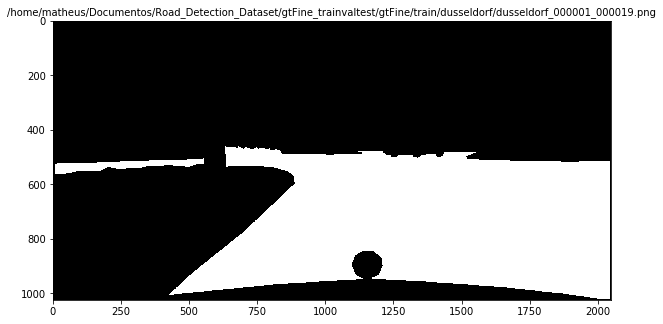

In [72]:
mask_name = json_list[1][0:-21] + '.png'
f, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(mask_gen, cmap='gray')
ax.set_title(mask_name, fontsize=10)

Text(0.5, 1.0, 'Máscara redimensionada')

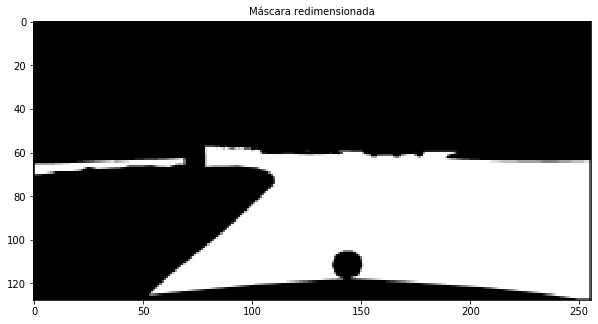

In [73]:
resized_mask = cv.resize(mask_gen, dim, interpolation = cv.INTER_AREA)
f, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(resized_mask, cmap='gray')
ax.set_title('Máscara redimensionada', fontsize=10)

## Gerando máscaras
Gerando as máscaras no caminho definido. Lembrando novamente de sempre deixar no formato ..../img/ para que seja possível realizar a leitura no Pytorch.

In [76]:
#Indo para diretório que será salvo
print("Diretório atual: ", os.getcwd())
os.chdir(DATA_SAVE+'/'+NAME_CITY)
print("Mudando para: ", os.getcwd())
if not os.path.isdir('mask_image'):
    os.mkdir('mask_image')
    os.chdir('./mask_image')
    os.mkdir('img')
    os.chdir('./img')
else:
    os.chdir('./mask_image/img')
print("Diretório final: ",os.getcwd())

name_files = json_list[0].split('/')
print('\n\n'+name_files[len(name_files)-1][:-5])

Diretório atual:  /home/matheus/Documentos/E-Net_Road-Detection/CityScapes_RoadDetection/dusseldorf/mask_image/img
Mudando para:  /home/matheus/Documentos/E-Net_Road-Detection/CityScapes_RoadDetection/dusseldorf
Diretório final:  /home/matheus/Documentos/E-Net_Road-Detection/CityScapes_RoadDetection/dusseldorf/mask_image/img


dusseldorf_000000_000019_gtFine_polygons


In [78]:
for i in range(len(json_list)):
    mask_gen = np.zeros((initial_dim[1],initial_dim[0]), np.uint8)
    with open(json_list[i]) as json_file:
        json_file = json.load(json_file)
        for dict_elem in json_file['objects']:
            #Extraindo polígonos
            if dict_elem['label'] == 'road':
                pts = np.array(dict_elem['polygon'],np.int32)
                cv.fillPoly(mask_gen,[pts],255)
            else:
                pts = np.array(dict_elem['polygon'],np.int32)
                cv.fillPoly(mask_gen,[pts],0)
    resized_mask = cv.resize(mask_gen, dim, interpolation = cv.INTER_AREA)
    name_files = json_list[i].split('/')
    cv.imwrite(name_files[len(name_files)-1][:-5]+'.png',resized_mask)
    print('Imagem: '+name_files[len(name_files)-1][:-5]+'.png {}/{} - {:.0f}%'.format(i+1,len(json_list),(i+1)/len(json_list)*100) )

Imagem: dusseldorf_000000_000019_gtFine_polygons.png 1/221 - 0%
Imagem: dusseldorf_000001_000019_gtFine_polygons.png 2/221 - 1%
Imagem: dusseldorf_000002_000019_gtFine_polygons.png 3/221 - 1%
Imagem: dusseldorf_000003_000019_gtFine_polygons.png 4/221 - 2%
Imagem: dusseldorf_000004_000019_gtFine_polygons.png 5/221 - 2%
Imagem: dusseldorf_000005_000019_gtFine_polygons.png 6/221 - 3%
Imagem: dusseldorf_000006_000019_gtFine_polygons.png 7/221 - 3%
Imagem: dusseldorf_000007_000019_gtFine_polygons.png 8/221 - 4%
Imagem: dusseldorf_000008_000019_gtFine_polygons.png 9/221 - 4%
Imagem: dusseldorf_000009_000019_gtFine_polygons.png 10/221 - 5%
Imagem: dusseldorf_000010_000019_gtFine_polygons.png 11/221 - 5%
Imagem: dusseldorf_000011_000019_gtFine_polygons.png 12/221 - 5%
Imagem: dusseldorf_000012_000019_gtFine_polygons.png 13/221 - 6%
Imagem: dusseldorf_000013_000019_gtFine_polygons.png 14/221 - 6%
Imagem: dusseldorf_000014_000019_gtFine_polygons.png 15/221 - 7%
Imagem: dusseldorf_000015_000019_g

Imagem: dusseldorf_000158_000019_gtFine_polygons.png 159/221 - 72%
Imagem: dusseldorf_000159_000019_gtFine_polygons.png 160/221 - 72%
Imagem: dusseldorf_000160_000019_gtFine_polygons.png 161/221 - 73%
Imagem: dusseldorf_000161_000019_gtFine_polygons.png 162/221 - 73%
Imagem: dusseldorf_000162_000019_gtFine_polygons.png 163/221 - 74%
Imagem: dusseldorf_000163_000019_gtFine_polygons.png 164/221 - 74%
Imagem: dusseldorf_000164_000019_gtFine_polygons.png 165/221 - 75%
Imagem: dusseldorf_000165_000019_gtFine_polygons.png 166/221 - 75%
Imagem: dusseldorf_000166_000019_gtFine_polygons.png 167/221 - 76%
Imagem: dusseldorf_000167_000019_gtFine_polygons.png 168/221 - 76%
Imagem: dusseldorf_000168_000019_gtFine_polygons.png 169/221 - 76%
Imagem: dusseldorf_000169_000019_gtFine_polygons.png 170/221 - 77%
Imagem: dusseldorf_000170_000019_gtFine_polygons.png 171/221 - 77%
Imagem: dusseldorf_000171_000019_gtFine_polygons.png 172/221 - 78%
Imagem: dusseldorf_000172_000019_gtFine_polygons.png 173/221 -